# Modeling

> Model selection
1. 엘라스틱 - Ridge, Lasso 합친거니까 선택
2. xgboost - 트리모형
3. lightgbm - 트리모형
4. randomForest - 트리모형

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import RepeatedKFold
from IPython.display import display
import matplotlib.pyplot as plt


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('C:/Users/User/Desktop/Viral_Effect/SNS-scraping/Movie_Data_Final_transformation.xlsx').iloc[:,1:]

In [3]:
data

,movie_name,release,take,audience,nation,distribution_company,code,genre,kind,scale,running_time,age,actor,log_youtube_view_mean,sqrt_comment_count,sqrt_abs_mean_score,sqrt_actor_power
0,택시운전사,2017-08-02,9.585365e+10,12186327.0,한국,(주)쇼박스,20162869.0,['드라마'],일반영화,장편,137분 0초,15세이상관람가,"['송강호', '토마스 크레취만', '류준열']",12.854272,56.462377,1.757064,3087.095601
1,신과함께-죄와 벌,2017-12-20,2.314122e+11,28823004.0,한국,롯데쇼핑㈜롯데엔터테인먼트,20150976.0,"['판타지', '드라마']",일반영화,장편,139분 32초,12세이상관람가,"['하정우', '차태현', '주지훈', '김향기', '마동석']",13.229750,98.903994,1.228373,2605.491412
2,공조,2017-01-18,6.378305e+10,7817618.0,한국,(주)씨제이이엔엠,20151228.0,['액션'],일반영화,장편,125분 0초,15세이상관람가,"['현빈', '유해진', '김주혁', '장영남', '이해영', '임윤아', '이동휘']",13.543377,13.747727,1.201012,2227.585689
3,스파이더맨: 홈 커밍,2017-07-05,5.912581e+10,7258678.0,미국,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,20167303.0,"['액션', '어드벤처', 'SF']",일반영화,장편,133분 16초,12세이상관람가,"['톰 홀랜드', '로버트 다우니 주니어', '마이클 키튼']",13.976041,68.709534,1.132482,2601.649400
4,범죄도시,2017-10-03,5.631801e+10,6879841.0,한국,"메가박스중앙(주)플러스엠,(주)키위미디어그룹",20172742.0,"['범죄', '액션']",일반영화,장편,121분 0초,청소년관람불가,"['마동석', '윤계상', '조재윤', '최귀화', '김성규']",13.994693,33.481338,1.327871,1681.116620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,검객,2020-09-23,1.619782e+09,190237.0,한국,"(주)키위미디어그룹,오퍼스픽쳐스(유),(주)씨네필운",20178401.0,['액션'],일반영화,장편,100분 24초,15세이상관람가,"['장혁', '김현수', '조 타슬림']",12.194363,23.043437,1.740139,436.161667
187,조제,2020-12-10,1.673428e+09,186647.0,한국,워너브러더스 코리아(주),20201002.0,"['멜로/로맨스', '드라마']",일반영화,장편,116분 51초,15세이상관람가,"['한지민', '남주혁']",11.006664,33.645208,1.561743,1155.563326
188,사라진 시간,2020-06-18,1.652523e+09,185802.0,한국,(주)에이스메이커무비웍스,20193859.0,"['미스터리', '드라마']",일반영화,장편,104분 38초,15세이상관람가,"['조진웅', '배수빈', '정해균', '차수연']",10.778888,27.928480,1.795978,1368.275557
189,밤쉘: 세상을 바꾼 폭탄선언,2020-07-08,1.544025e+09,182026.0,미국,(주)홈초이스,20204644.0,['드라마'],예술영화,장편,108분 51초,15세이상관람가,"['샤를리즈 테론', '니콜 키드먼', '마고 로비']",8.983176,11.916375,2.091052,723.705914


In [50]:
# 영화명 날림
modeling_data = data.iloc[:,1:].copy()

In [51]:
modeling_data

,audience,nation,distribution_company,genre,running_time,age,youtube_comment_count,youtube_view_mean,abs_mean_score,actor_power
0,16265618,한국,(주)씨제이이엔엠,코미디,111,15세이상관람가,9518,616945.8,1.019999,4.539712e+06
1,13934592,미국,월트디즈니컴퍼니코리아 유한책임회사,액션,180,12세이상관람가,26299,3047574.7,2.126920,9.367612e+06
2,27495584,미국,월트디즈니컴퍼니코리아 유한책임회사,애니메이션,103,전체관람가,20661,9814174.2,1.154460,9.751492e+06
3,25447554,미국,월트디즈니컴퍼니코리아 유한책임회사,어드벤처,127,전체관람가,6934,4894125.2,1.495438,6.752496e+06
4,20626290,한국,(주)씨제이이엔엠,드라마,131,15세이상관람가,10215,1974417.4,2.085190,5.109347e+06
...,...,...,...,...,...,...,...,...,...,...
89,217056,영국,(주)이놀미디어,어드벤처,106,12세이상관람가,207,347976.1,0.791509,8.232217e+04
90,190237,한국,(주)키위미디어그룹,액션,100,15세이상관람가,531,197671.7,3.028084,1.902370e+05
91,186647,한국,워너브러더스 코리아(주),멜로/로맨스,116,15세이상관람가,1132,60274.5,2.439042,1.335327e+06
92,185802,한국,(주)에이스메이커무비웍스,미스터리,104,15세이상관람가,780,47996.7,3.225536,1.872178e+06


## One-hot encoding

In [52]:
modeling_data = pd.get_dummies(data = modeling_data, columns = ['nation'], prefix = 'nation')
modeling_data = pd.get_dummies(data = modeling_data, columns = ['distribution_company'], prefix = 'distribution_company')
modeling_data = pd.get_dummies(data = modeling_data, columns = ['genre'], prefix = 'genre')
modeling_data = pd.get_dummies(data = modeling_data, columns = ['age'], prefix = 'age')

In [53]:
modeling_data

,audience,running_time,youtube_comment_count,youtube_view_mean,abs_mean_score,actor_power,nation_미국,nation_영국,nation_한국,distribution_company_(주)넥스트엔터테인먼트월드(NEW),...,genre_애니메이션,genre_액션,genre_어드벤처,genre_전쟁,genre_코미디,genre_판타지,age_12세이상관람가,age_15세이상관람가,age_전체관람가,age_청소년관람불가
0,16265618,111,9518,616945.8,1.019999,4.539712e+06,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,13934592,180,26299,3047574.7,2.126920,9.367612e+06,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,27495584,103,20661,9814174.2,1.154460,9.751492e+06,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,25447554,127,6934,4894125.2,1.495438,6.752496e+06,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,20626290,131,10215,1974417.4,2.085190,5.109347e+06,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,217056,106,207,347976.1,0.791509,8.232217e+04,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
90,190237,100,531,197671.7,3.028084,1.902370e+05,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
91,186647,116,1132,60274.5,2.439042,1.335327e+06,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
92,185802,104,780,47996.7,3.225536,1.872178e+06,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
# # 모델별 성능 확인을 위한 성능
# import matplotlib.pyplot as plt
# import seaborn as sns

# my_predictions = {}
# my_pred = None
# my_actual = None
# my_name = None

# colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
#           'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
#           'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
#           'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
#           'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
#           'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
#          ]

# def plot_predictions(name_, pred, actual):
#     df = pd.DataFrame({'prediction': pred, 'actual': y_test})
#     df = df.sort_values(by='actual').reset_index(drop=True)

#     plt.figure(figsize=(11, 8))
#     plt.scatter(df.index, df['prediction'], marker='x', color='r')
#     plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
#     plt.title(name_, fontsize=15)
#     plt.legend(['prediction', 'actual'], fontsize=12)
#     plt.show()

# def mse_eval(name_, pred, actual):
#     global my_predictions, colors, my_pred, my_actual, my_name
    
#     my_name = name_
#     my_pred = pred
#     my_actual = actual
    
#     plot_predictions(name_, pred, actual)
    
#     mse = mean_squared_error(pred, actual)
#     my_predictions[name_] = mse
    
#     y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
#     df = pd.DataFrame(y_value, columns=['model', 'mse'])
#     print(df)
#     min_ = df['mse'].min() - 10
#     max_ = df['mse'].max() + 10
    
#     length = len(df) / 2
    
#     plt.figure(figsize=(9, length))
#     ax = plt.subplot()
#     ax.set_yticks(np.arange(len(df)))
#     ax.set_yticklabels(df['model'], fontsize=12)
#     bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
#     for i, v in enumerate(df['mse']):
#         idx = np.random.choice(len(colors))
#         bars[i].set_color(colors[idx])
#         ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
#     plt.title('MSE Error', fontsize=16)
#     plt.xlim(min_, max_)
    
#     plt.show()

# def add_model(name_, pred, actual):
#     global my_predictions, my_pred, my_actual, my_name
#     my_name = name_
#     my_pred = pred
#     my_actual = actual
    
#     mse = mean_squared_error(pred, actual)
#     my_predictions[name_] = mse

# def remove_model(name_):
#     global my_predictions
#     try:
#         del my_predictions[name_]
#     except KeyError:
#         return False
#     return True

# def plot_all():
#     global my_predictions, my_pred, my_actual, my_name
    
#     plot_predictions(my_name, my_pred, my_actual)
    
#     y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
#     df = pd.DataFrame(y_value, columns=['model', 'mse'])
#     print(df)
#     min_ = df['mse'].min() - 10
#     max_ = df['mse'].max() + 10
    
#     length = len(df) / 2
    
#     plt.figure(figsize=(9, length))
#     ax = plt.subplot()
#     ax.set_yticks(np.arange(len(df)))
#     ax.set_yticklabels(df['model'], fontsize=12)
#     bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
#     for i, v in enumerate(df['mse']):
#         idx = np.random.choice(len(colors))
#         bars[i].set_color(colors[idx])
#         ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
#     plt.title('MSE Error', fontsize=16)
#     plt.xlim(min_, max_)
    
#     plt.show()

In [11]:
#Validation function

def rmsle(y, y_pred):
    print(y.shape)
    print(y_pred.shape)
    return np.sqrt(mean_squared_error(y, y_pred))

## ElasticNet

In [60]:
modeling_data

,audience,running_time,youtube_comment_count,youtube_view_mean,abs_mean_score,actor_power,nation_미국,nation_영국,nation_한국,distribution_company_(주)넥스트엔터테인먼트월드(NEW),...,genre_애니메이션,genre_액션,genre_어드벤처,genre_전쟁,genre_코미디,genre_판타지,age_12세이상관람가,age_15세이상관람가,age_전체관람가,age_청소년관람불가
0,16265618,111,9518,616945.8,1.019999,4.539712e+06,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,13934592,180,26299,3047574.7,2.126920,9.367612e+06,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,27495584,103,20661,9814174.2,1.154460,9.751492e+06,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,25447554,127,6934,4894125.2,1.495438,6.752496e+06,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,20626290,131,10215,1974417.4,2.085190,5.109347e+06,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,217056,106,207,347976.1,0.791509,8.232217e+04,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
90,190237,100,531,197671.7,3.028084,1.902370e+05,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
91,186647,116,1132,60274.5,2.439042,1.335327e+06,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
92,185802,104,780,47996.7,3.225536,1.872178e+06,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
X = modeling_data.iloc[:,1:]
y = modeling_data.iloc[:,0]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)

In [100]:
X

,running_time,youtube_comment_count,youtube_view_mean,abs_mean_score,actor_power,nation_미국,nation_영국,nation_한국,distribution_company_(주)넥스트엔터테인먼트월드(NEW),distribution_company_(주)누리픽쳐스,...,genre_애니메이션,genre_액션,genre_어드벤처,genre_전쟁,genre_코미디,genre_판타지,age_12세이상관람가,age_15세이상관람가,age_전체관람가,age_청소년관람불가
0,111,9518,616945.8,1.019999,4.539712e+06,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,180,26299,3047574.7,2.126920,9.367612e+06,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,103,20661,9814174.2,1.154460,9.751492e+06,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,127,6934,4894125.2,1.495438,6.752496e+06,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,131,10215,1974417.4,2.085190,5.109347e+06,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,106,207,347976.1,0.791509,8.232217e+04,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
90,100,531,197671.7,3.028084,1.902370e+05,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
91,116,1132,60274.5,2.439042,1.335327e+06,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
92,104,780,47996.7,3.225536,1.872178e+06,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
y

0     16265618
1     13934592
2     27495584
3     25447554
4     20626290
        ...   
89      217056
90      190237
91      186647
92      185802
93      182026
Name: audience, Length: 94, dtype: int64

In [91]:
X

,running_time,youtube_comment_count,youtube_view_mean,abs_mean_score,actor_power,nation_미국,nation_영국,nation_한국,distribution_company_(주)넥스트엔터테인먼트월드(NEW),distribution_company_(주)누리픽쳐스,...,genre_애니메이션,genre_액션,genre_어드벤처,genre_전쟁,genre_코미디,genre_판타지,age_12세이상관람가,age_15세이상관람가,age_전체관람가,age_청소년관람불가
0,111,9518,616945.8,1.019999,4.539712e+06,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,180,26299,3047574.7,2.126920,9.367612e+06,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,103,20661,9814174.2,1.154460,9.751492e+06,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,127,6934,4894125.2,1.495438,6.752496e+06,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,131,10215,1974417.4,2.085190,5.109347e+06,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,106,207,347976.1,0.791509,8.232217e+04,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
90,100,531,197671.7,3.028084,1.902370e+05,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
91,116,1132,60274.5,2.439042,1.335327e+06,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
92,104,780,47996.7,3.225536,1.872178e+06,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(xtrain,ytrain)   
    score = model.score(xtest, ytest) # score로 평가
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
          .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.75, MSE:199159.78, RMSE:446.27
Alpha:0.0010, R2:0.77, MSE:195938.35, RMSE:442.65
Alpha:0.0100, R2:0.82, MSE:194064.16, RMSE:440.53
Alpha:0.1000, R2:0.85, MSE:223995.18, RMSE:473.28
Alpha:0.3000, R2:0.84, MSE:244128.48, RMSE:494.09
Alpha:0.5000, R2:0.84, MSE:252608.25, RMSE:502.60
Alpha:0.7000, R2:0.84, MSE:257630.25, RMSE:507.57
Alpha:1.0000, R2:0.84, MSE:262444.58, RMSE:512.29


In [93]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(X, y)
# summarize chosen configuration
print('alpha: {}'.format(model.alpha_))
print('l1_ratio_: {}'.format(model.l1_ratio_))

alpha: 100.0
l1_ratio_: 0.0


In [76]:
model

ElasticNetCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0],
             cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             l1_ratio=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
             n_jobs=-1)

In [65]:
n_folds = 10
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [94]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10, n_jobs=-1)
elasticNet.fit(x_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )
print("Try again for more precision with l1_ratio centered around " + str(ratio))

elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10, n_jobs=-1)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10, n_jobs=-1)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv(elasticNet).mean())
y_ela = elasticNet.predict(X_train)

Best l1_ratio : 0.3
Best alpha : 0.0001
Try again for more precision with l1_ratio centered around 0.3
Best l1_ratio : 0.345
Best alpha : 0.0001
Now try again for more precision on alpha, with l1_ratio fixed at 0.345 and alpha centered around 0.0001
Best l1_ratio : 0.345
Best alpha : 6e-05
ElasticNet RMSE on Training set : 4.605745884529476e-06


Best l1_ratio : 0.3
Best alpha : 0.0001
Try again for more precision with l1_ratio centered around 0.3
Best l1_ratio : 0.345
Best alpha : 0.0001
Now try again for more precision on alpha, with l1_ratio fixed at 0.345 and alpha centered around 0.0001
Best l1_ratio : 0.345
Best alpha : 6e-05
ElasticNet RMSE on Training set : 4.605745884529476e-06


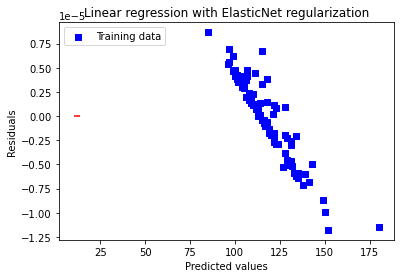

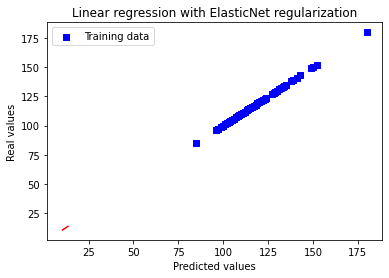

ElasticNet picked 4 features and eliminated the other 40 features


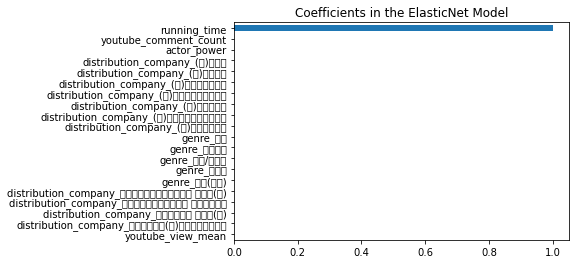

In [66]:
# Plot residuals
plt.scatter(y_ela, y_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_ela, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()